# Exploratory Data Analysis
## Team 01 DSCI-522 Group Project

## Data
Data used for this project comes from UC Irvine's Machine Learning Repository https://archive-beta.ics.uci.edu/dataset/27/credit+approval
The dataset contains data on Japanese Credit Card screeing for credit card applications where all attribute names and values have been anonymized in order to protect the confidentiality of the applicants.  Features contained in the dataset include continuous features and categorical features named A1-A16.  The target feature is A16 containing values `+` or `-` indicating wheather the candidate was approved or not.

In [40]:
# Importing needed libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

**Read in data**
We are creating a dataframe with the data and looking at the top few rows in order to get an initial feel for what the data looks like.  

In [2]:
df = pd.read_csv("crx.csv", encoding="utf-8")
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43,560,+
2,a,24.5,0.500,u,g,q,h,1.50,t,f,0,f,g,280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120,0,+


With df.shape we can see that there are 690 observations of the 16 features in the dataset.  So this is not a very big dataset.

In [3]:
df.shape

(690, 16)

**Initial look at data**
The dataset has 16 columns with 690 values each all of which are non-null.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      690 non-null    object 
 1   A2      690 non-null    object 
 2   A3      690 non-null    float64
 3   A4      690 non-null    object 
 4   A5      690 non-null    object 
 5   A6      690 non-null    object 
 6   A7      690 non-null    object 
 7   A8      690 non-null    float64
 8   A9      690 non-null    object 
 9   A10     690 non-null    object 
 10  A11     690 non-null    int64  
 11  A12     690 non-null    object 
 12  A13     690 non-null    object 
 13  A14     690 non-null    object 
 14  A15     690 non-null    int64  
 15  A16     690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


**Check for missing values**
The data has no missing values.

In [5]:
df.isnull().sum()

A1     0
A2     0
A3     0
A4     0
A5     0
A6     0
A7     0
A8     0
A9     0
A10    0
A11    0
A12    0
A13    0
A14    0
A15    0
A16    0
dtype: int64

By looking at `df.describe` results we can see that we have numerical columns as well as categorical ones. Some columns are contain values `t` and `f` which stands for true and false.  We might need to change them in the preprocessing stage. 

In [6]:
df.describe()

,A3,A8,A11,A15
count,690.000000,690.000000,690.00000,690.000000
mean,4.758725,2.223406,2.40000,1017.385507
std,4.978163,3.346513,4.86294,5210.102598
min,0.000000,0.000000,0.00000,0.000000
25%,1.000000,0.165000,0.00000,0.000000
50%,2.750000,1.000000,0.00000,5.000000
75%,7.207500,2.625000,3.00000,395.500000
max,28.000000,28.500000,67.00000,100000.000000


**Take a look at individual columns of the dataset**

In order to better understand what the data contains we want to look at the individual columns separately.  We'll first look at the values distribution for the categorical columns.
After taking an initial look at feature `A1` becomes clear that missing values are replaced with a `?`.  This will require us to preprocess the data in order to account for these missing values.  Missing values have been replaced in some of the other categorical columns, e.g. `A4`, `A5`, `A6` and `A7`.  These will need to be replaced with null values in preprocessing.  The other categorical columns are clean of missing values.

Missing values exist also in some of the numerical columns like `A2` and `A14`, where the missing values have been replaced with a `?`.  This change makes Pandas evaluate the two columns as categorical although they are numeric.

The target feature `A16` contains values of `+` and `-` for positive or negative approval decision on the credit card application.  This column is well balanced with about 300 positive and 390 negative values, which makes the target well balanced.

<AxesSubplot: title={'center': 'Feature A1 value counts'}, ylabel='Value splits'>

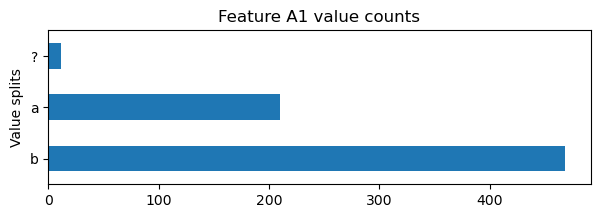

In [7]:
df['A1'].value_counts().plot(kind='barh', figsize=(7,2), title = "Feature A1 value counts", xlabel = "Value splits")

<AxesSubplot: title={'center': 'Feature A4 value counts'}, ylabel='Value splits'>

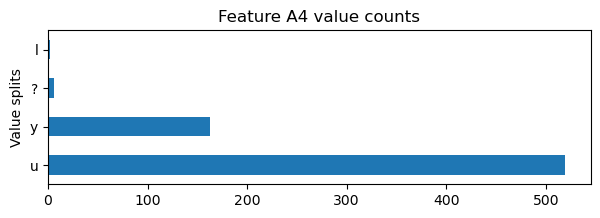

In [8]:
df['A4'].value_counts().plot(kind='barh', figsize=(7,2), title = "Feature A4 value counts", xlabel = "Value splits")

<AxesSubplot: title={'center': 'Feature A5 value counts'}, ylabel='Value splits'>

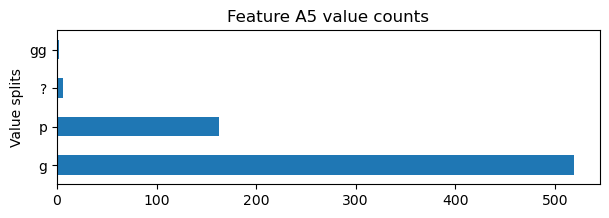

In [9]:
df['A5'].value_counts().plot(kind='barh', figsize=(7,2), title = "Feature A5 value counts", xlabel = "Value splits")

<AxesSubplot: title={'center': 'Feature A6 value counts'}, ylabel='Value splits'>

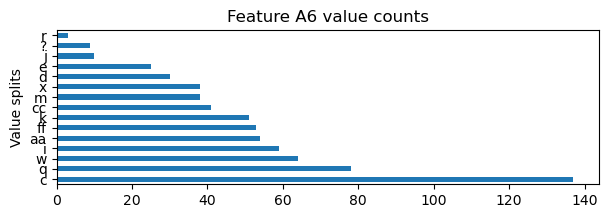

In [10]:
df['A6'].value_counts().plot(kind='barh', figsize=(7,2), title = "Feature A6 value counts", xlabel = "Value splits")

<AxesSubplot: title={'center': 'Feature A7 value counts'}, ylabel='Value splits'>

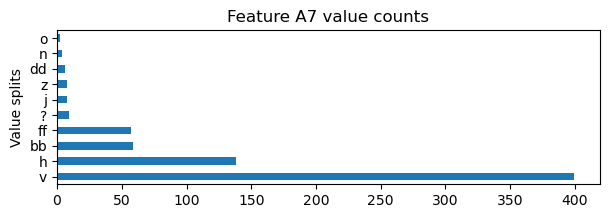

In [11]:
df['A7'].value_counts().plot(kind='barh', figsize=(7,2), title = "Feature A7 value counts", xlabel = "Value splits")

<AxesSubplot: title={'center': 'Feature A9 value counts'}, ylabel='Value splits'>

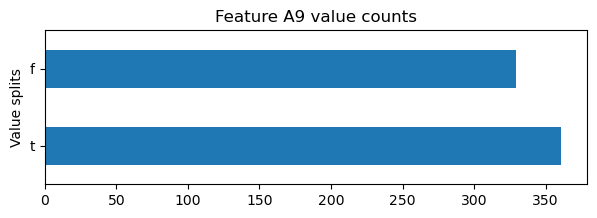

In [12]:
df['A9'].value_counts().plot(kind='barh', figsize=(7,2), title = "Feature A9 value counts", xlabel = "Value splits")

<AxesSubplot: title={'center': 'Feature A10 value counts'}, ylabel='Value splits'>

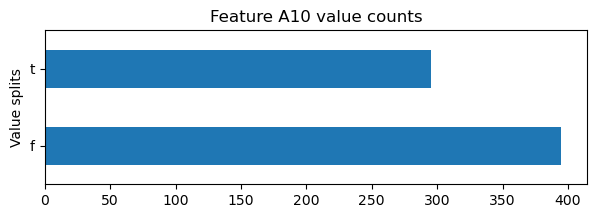

In [13]:
df['A10'].value_counts().plot(kind='barh', figsize=(7,2), title = "Feature A10 value counts", xlabel = "Value splits")

<AxesSubplot: title={'center': 'Feature A12 value counts'}, ylabel='Value splits'>

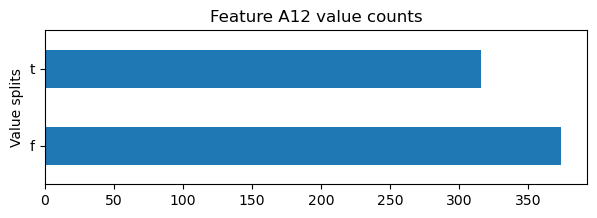

In [14]:
df['A12'].value_counts().plot(kind='barh', figsize=(7,2), title = "Feature A12 value counts", xlabel = "Value splits")

<AxesSubplot: title={'center': 'Feature A13 value counts'}, ylabel='Value splits'>

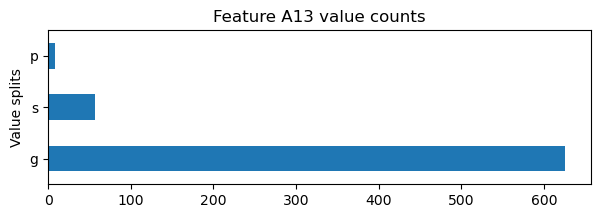

In [15]:
df['A13'].value_counts().plot(kind='barh', figsize=(7,2), title = "Feature A13 value counts", xlabel = "Value splits")

<AxesSubplot: title={'center': 'Feature A16 value counts'}, ylabel='Value splits'>

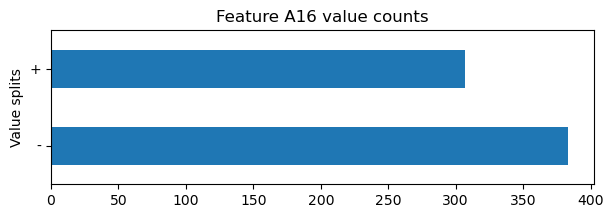

In [16]:
df['A16'].value_counts().plot(kind='barh', figsize=(7,2), title = "Feature A16 value counts", xlabel = "Value splits")

**Replace `?` with `np.nan`**

In order to gain better understanding of the missing values, we are replacing the question mark in place of missing values with `np.nan`. Now when we run an evaluation of the missing values, we get a better picture of the features containing `nan` values:

In [17]:
df = df.replace('?', np.nan)

In [18]:
df.isnull().sum()

A1     12
A2     12
A3      0
A4      6
A5      6
A6      9
A7      9
A8      0
A9      0
A10     0
A11     0
A12     0
A13     0
A14    13
A15     0
A16     0
dtype: int64

**Convert columns A2 and A14 to float**

Originaly the two columns `A2` and `A14` were interpreted as categorical by Pandas due to the `?` in place of missing values.  Now that we have replaced `?` with `np.nan` we can convert these columns as type `float` in order to better understand their values.  We can see in the description of the numeric columns that the values have different degree of variance and min-max values, which will require us to scale the numeric values in the preprocessing phase of our analysis.

In [26]:
df[['A2', 'A14']] = df[['A2', 'A14']] .astype(float)

In [27]:
df.describe()

,A2,A3,A8,A11,A14,A15
count,678.000000,690.000000,690.000000,690.00000,677.000000,690.000000
mean,31.568171,4.758725,2.223406,2.40000,184.014771,1017.385507
std,11.957862,4.978163,3.346513,4.86294,173.806768,5210.102598
min,13.750000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,22.602500,1.000000,0.165000,0.00000,75.000000,0.000000
50%,28.460000,2.750000,1.000000,0.00000,160.000000,5.000000
75%,38.230000,7.207500,2.625000,3.00000,276.000000,395.500000
max,80.250000,28.000000,28.500000,67.00000,2000.000000,100000.000000


We also want to get a better understanding of the value distributions in the numeric columns by creating histograms with each of the values in the numeric columns.

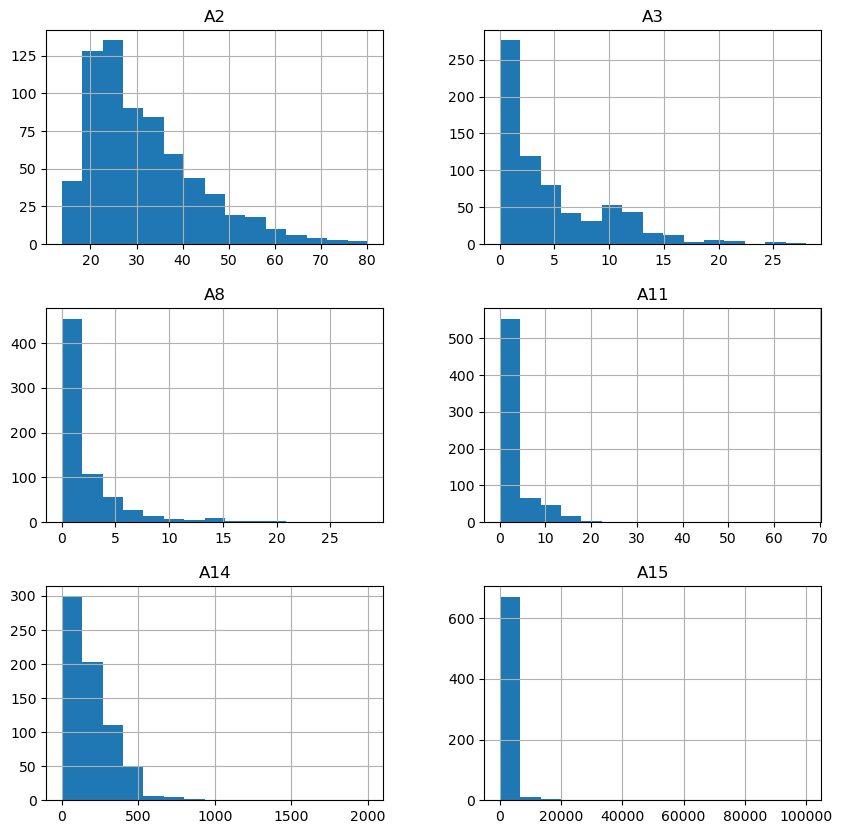

In [55]:
hist = df.hist(bins = 15, figsize = (10,10))

**Correlation matrix**

Finally we want to look at the correlations among the numeric values.  We can see that there are no major outliers in terms of correlations.  This is a good sign, because it means that all the numeric features can potentially add value in the analysis.

In [43]:
corr = df.corr('spearman').style.background_gradient()
corr

,A2,A3,A8,A11,A14,A15
A2,1.000000,0.116843,0.257384,0.123252,-0.015741,0.041962
A3,0.116843,1.000000,0.266057,0.204199,-0.296037,0.106388
A8,0.257384,0.266057,1.000000,0.314813,-0.035486,0.086870
A11,0.123252,0.204199,0.314813,1.000000,-0.134102,0.427244
A14,-0.015741,-0.296037,-0.035486,-0.134102,1.000000,-0.065731
A15,0.041962,0.106388,0.086870,0.427244,-0.065731,1.000000
